# Άσκηση 6

Αρχικά θα χρησιμοποιήσουμε τις βιβλιοθήκες dplyr, foreign, caret, klaR, fpc, reshape και ROCR οπότε τις εισαγάγουμε.

In [15]:
library('dplyr')
library('foreign')
library('caret')
library('klaR')
library('fpc')
library('reshape')

## Ερώτημα 1

Αρχικά διαβάζουμε τα δεδομένα από το αντίστοιχο αρχείο.

In [2]:
file_path<-'./ionoshere.txt'
data <- read.arff(file=file_path)

df<- as.data.frame(data)
print(paste('Το σύνολο των γραμμών του πίνακα που διαβάσαμε είναι : ', dim(df)[1]))
print(paste('Το σύνολο των στηλών του πίνακα που διαβάσαμε είναι : ', dim(df)[2]))

[1] "Το σύνολο των γραμμών του πίνακα που διαβάσαμε είναι :  351"
[1] "Το σύνολο των στηλών του πίνακα που διαβάσαμε είναι :  35"


### Υποερώτημα 1.1

θα χρησιμοποιήσουμε cross validation για να κατηγοριοποιήσουμε τα δεδομένα. Στο cross validation  το σύνολο δεδομένων διαιρείται σε n υποσύνολα. Η επιλογή των υποσυνόλων είναι τυχαία. Ένα από τα υποσύνολα χρησιμοποιείται ως σύνολο επικύρωσης και τα υπόλοιπα συνενώνονται και δημιουργούν το σύνολο εκπαίδευσης. Το μοντέλο εκπαιδεύεται χρησιμοποιώντας το σύνολο εκπαίδευσης και δοκιμάζεται έναντι του συνόλου επικύρωσης.  Η διαδικασία επαναλαμβάνεται n φορές, κάθε φορά χρησιμοποιώντας ένα διαφορετικό σύνολο ως σύνολο επικύρωσης και τα υπόλοιπα ως σύνολο εκπαίδευσης. Στο τέλος υπολογίζεται η μέση επίδοση του μοντέλου.

Από τη βιβλιοθήκη caret χρησιμοποιούμε trainControl() και στη συνέχεια εκπαιδεύουε το μοντέλο χρησιμοποιώντας τη μέθοδο naive bayes για τις διάφορεσ τιμές του k. 

In [3]:
k_fold <- function(k) {
    
    # define training control
    train_control <- trainControl(method="cv", number=k)
    
    # Train the model
    model <- train(class ~., data = df, method = "naive_bayes",
               trControl = train_control)
    
    print(model)
    print('----------------------------------------------------')
}

Αντικαθιστούμε τη τιμή της class με 0 και 1 ανάλογα με την τιμή της.

In [4]:
resdf<-mutate(df,class= ifelse(class == 'g', 1, 0))

Επαναλαμβάνουμε για διάφορες τιμές του k

In [5]:
for( k in 2:9){
  k_fold (k)
}

Naive Bayes 

351 samples
 34 predictor
  2 classes: 'b', 'g' 

No pre-processing
Resampling: Cross-Validated (2 fold) 
Summary of sample sizes: 175, 176 
Resampling results across tuning parameters:

  usekernel  Accuracy   Kappa    
  FALSE      0.8774188  0.7351309
   TRUE      0.9088312  0.8025931

Tuning parameter 'laplace' was held constant at a value of 0
Tuning
 parameter 'adjust' was held constant at a value of 1
Accuracy was used to select the optimal model using the largest value.
The final values used for the model were laplace = 0, usekernel = TRUE
 and adjust = 1.
[1] "----------------------------------------------------"
Naive Bayes 

351 samples
 34 predictor
  2 classes: 'b', 'g' 

No pre-processing
Resampling: Cross-Validated (3 fold) 
Summary of sample sizes: 234, 234, 234 
Resampling results across tuning parameters:

  usekernel  Accuracy   Kappa    
  FALSE      0.8746439  0.7294549
   TRUE      0.9031339  0.7902923

Tuning parameter 'laplace' was held constant at

## Ερώτημα 2

Αρχικά διαβάζουμε τα δεδομένα από το αντίστοιχο αρχείο.

In [6]:
file_path_vowel<-'./vowel.txt'
vowel <- read.arff(file=file_path_vowel)

### Υποερώτημα 2.1

Αρχικά μετονομάζουμε τις στήλες "Train or Test" και "Speaker Number" και αφαιρούμε τις 3 πρώτες στήλες.

In [7]:
names(vowel)[names(vowel) == "Train or Test"] <- "Train_or_Test"
names(vowel)[names(vowel) == "Speaker Number"] <- "Speaker_Number"
vowel_s<-dplyr::select(vowel,-(Train_or_Test:Sex))

### Υποερώτημα 2.2

Χρησιμοποιώντας τη μέθοδο kmeansruns για k μεταξύ 1 και 12 βρίσκουμε τον καλυτερο αριθμό συστάδων για τα δεδομένα.
Αυτή η μέθοδος χρησιμοποιεί 2 κριτήρια, το Calinski-Harabasz Index και το average silhouette width. Από τα δεδομένα αφαιρέθηκε και η στήλη class για το συγκεκριμένο υποερώτημα.

In [8]:
clustering.ch <- kmeansruns(vowel_s[,1:10], krange=1:12, criterion="ch") # Calinski-Harabasz Index 
clustering.ch

K-means clustering with 2 clusters of sizes 577, 413

Cluster means:
  Feature 0 Feature 1  Feature 2  Feature 3  Feature 4 Feature 5  Feature 6
1 -2.880172  1.096305 -0.5003189 0.84416464 -0.1424662 0.6912184 -0.1415113
2 -3.655797  2.979123 -0.5181792 0.05628329 -0.5336513 0.5450581  0.1872421
  Feature 7  Feature 8   Feature 9
1 0.2743484 -0.3265355  0.01492374
2 0.4234576 -0.2700605 -0.19185714

Clustering vector:
  [1] 1 1 1 1 1 1 2 2 2 1 1 1 1 1 1 1 1 2 2 2 1 1 1 1 1 1 1 2 2 2 1 1 1 1 1 1 1
 [38] 1 2 2 2 1 1 1 1 1 1 1 1 2 2 2 1 1 1 1 1 1 1 1 2 2 2 1 1 1 1 1 1 1 2 1 2 2
 [75] 2 2 1 1 1 1 1 2 1 2 2 2 2 1 1 1 1 1 2 1 2 2 2 2 1 1 1 1 1 2 1 2 2 2 2 1 1
[112] 1 1 1 2 1 2 2 2 2 1 1 1 1 1 2 1 2 2 2 2 1 1 1 1 1 1 1 1 2 1 2 1 1 1 1 1 1
[149] 1 1 2 1 2 1 1 1 1 1 1 1 1 2 1 2 1 1 1 1 1 1 1 1 2 1 2 1 1 1 1 1 1 1 1 2 1
[186] 2 1 1 1 1 1 1 1 1 2 1 2 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1
[223] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[260] 1 1 1 1 1 1 

In [9]:
clustering.asw <- kmeansruns(vowel_s[,1:10], krange=1:12, criterion="asw") # average silhouette width
clustering.asw

K-means clustering with 3 clusters of sizes 222, 381, 387

Cluster means:
  Feature 0 Feature 1   Feature 2    Feature 3  Feature 4 Feature 5
1 -3.646252  1.136505  0.05901802  1.312891892  0.1993919 0.4478784
2 -3.647724  3.037609 -0.55267192 -0.005695538 -0.5584173 0.5732992
3 -2.512796  1.171351 -0.78869767  0.571152455 -0.3465349 0.7909199
     Feature 6  Feature 7  Feature 8  Feature 9
1 -0.427243243 -0.2072162 -0.4426802  0.5418964
2  0.233913386  0.4524514 -0.2704882 -0.2282257
3  0.003633075  0.5343798 -0.2548191 -0.2686641

Clustering vector:
  [1] 3 3 3 3 3 3 2 2 2 3 3 3 3 3 3 3 3 2 2 2 3 3 3 3 3 3 3 3 2 2 3 3 3 3 3 3 3
 [38] 3 2 2 2 3 3 3 3 3 3 3 3 2 2 2 3 3 3 3 3 3 3 3 2 2 2 3 3 3 1 3 3 3 2 3 2 2
 [75] 2 2 3 1 3 3 3 2 3 2 2 2 2 3 1 3 3 3 2 3 2 2 2 2 3 1 3 3 3 2 3 2 2 2 2 3 1
[112] 3 3 3 2 3 2 2 2 2 3 1 3 3 3 2 3 2 2 2 2 3 3 3 3 3 3 3 3 2 3 2 3 3 3 3 3 3
[149] 3 3 2 1 2 3 3 3 3 3 3 3 1 2 1 2 3 3 3 3 3 3 3 3 2 3 2 3 3 3 3 3 3 3 3 2 3
[186] 1 3 3 3 3 3 3 3 3 2 3 2 3 3 3 3 3 2 

             Length Class  Mode   
cluster      990    -none- numeric
centers       20    -none- numeric
totss          1    -none- numeric
withinss       2    -none- numeric
tot.withinss   1    -none- numeric
betweenss      1    -none- numeric
size           2    -none- numeric
iter           1    -none- numeric
ifault         1    -none- numeric
crit          12    -none- numeric
bestk          1    -none- numeric

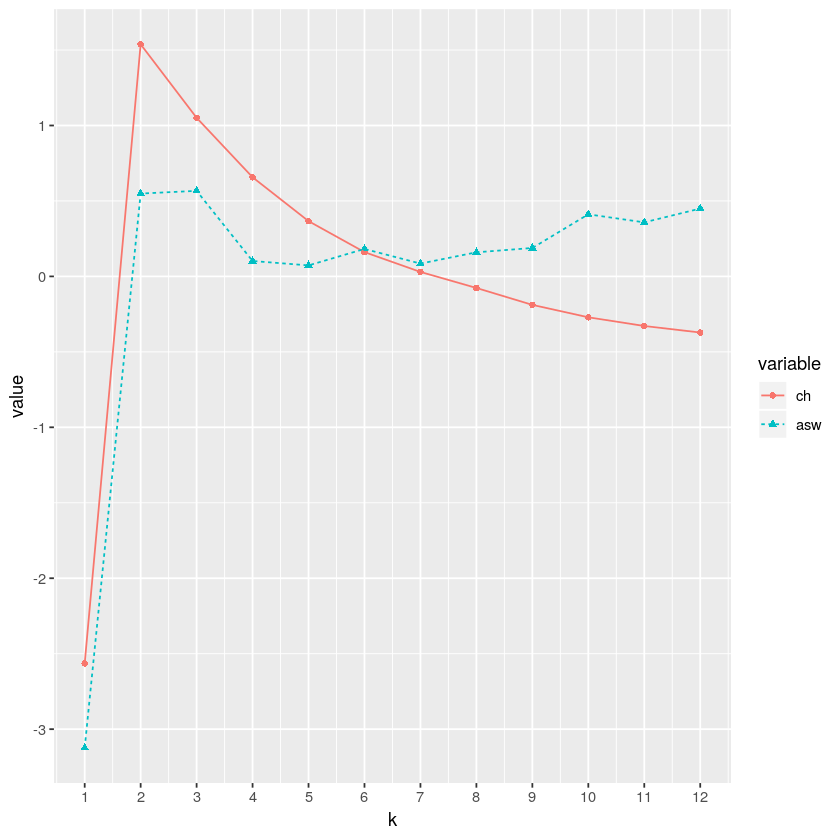

In [10]:
critframe <- data.frame(k=1:12, ch=scale(clustering.ch$crit),asw=scale(clustering.asw$crit))
critframe <- melt(critframe, id.vars=c("k"),variable.name="measure",value.name="score")

ggplot(critframe, aes(x=k, y=value, color=variable)) +
geom_point(aes(shape=variable)) + geom_line(aes(linetype=variable)) +
scale_x_continuous(breaks=1:12, labels=1:12)
summary(clustering.ch)

Παρατηρώτας το παραπάνω γράφημα καταλήγουμε ο καλύτερος αριθμός cluster είναι 2 για το κριτήριο Calinski-Harabasz και 3 για το average silhouette width. Στη συγκεκριμένη περίπτωση επιλέγουμε το k=2 διότι η διαφορα μεταξύ k=2 και k=3 για το asw είναι μικρή.

### Υποερώτημα 2.3

Στο συγκεκριμένο υποερώτημα επαναφέρουμε τη στήλη class και αντικαθιστούμε τις τιμές της σύμφωνα με τις πληροφορίες που έχουμε στο αρχείο των δεδομένων.

In [11]:
class_to_number <- function(name) {
  class_nbr1 <- 
    case_when(
        name == 'hid' ~ 0,
        name == 'hId' ~ 1,
        name == 'hEd' ~ 2,
        name == 'hAd' ~ 3,
        name == 'hYd' ~ 4,
        name == 'had' ~ 5,
        name == 'hOd' ~ 6,
        name == 'hod' ~ 7,
        name == 'hUd' ~ 8,
        name == 'hud' ~ 9,
        name == 'hed' ~ 10
    )
  return(class_nbr1)
}


vowel_s<-mutate(vowel_s,Class= class_to_number(Class))

Επαναλαμβάνουμε την ίδια διαδικασία με το προηγούμενο ερώτημα.

In [12]:
clustering.ch <- kmeansruns(vowel_s[,1:11], krange=1:12, criterion="ch") # Calinski-Harabasz Index 
clustering.ch

K-means clustering with 2 clusters of sizes 450, 540

Cluster means:
  Feature 0 Feature 1  Feature 2 Feature 3  Feature 4 Feature 5   Feature 6
1 -3.742858  2.582342 -0.3872778 0.3632444 -0.4603978 0.5915578  0.02329556
2 -2.754476  1.297948 -0.6081796 0.6423481 -0.1767074 0.6624833 -0.02741481
  Feature 7  Feature 8  Feature 9 Class
1 0.5206844 -0.2070133 -0.1337222   8.0
2 0.1831093 -0.3829444 -0.0193537   2.5

Clustering vector:
  [1] 2 2 2 2 2 2 1 1 1 1 1 2 2 2 2 2 2 1 1 1 1 1 2 2 2 2 2 2 1 1 1 1 1 2 2 2 2
 [38] 2 2 1 1 1 1 1 2 2 2 2 2 2 1 1 1 1 1 2 2 2 2 2 2 1 1 1 1 1 2 2 2 2 2 2 1 1
 [75] 1 1 1 2 2 2 2 2 2 1 1 1 1 1 2 2 2 2 2 2 1 1 1 1 1 2 2 2 2 2 2 1 1 1 1 1 2
[112] 2 2 2 2 2 1 1 1 1 1 2 2 2 2 2 2 1 1 1 1 1 2 2 2 2 2 2 1 1 1 1 1 2 2 2 2 2
[149] 2 1 1 1 1 1 2 2 2 2 2 2 1 1 1 1 1 2 2 2 2 2 2 1 1 1 1 1 2 2 2 2 2 2 1 1 1
[186] 1 1 2 2 2 2 2 2 1 1 1 1 1 2 2 2 2 2 2 1 1 1 1 1 2 2 2 2 2 2 1 1 1 1 1 2 2
[223] 2 2 2 2 1 1 1 1 1 2 2 2 2 2 2 1 1 1 1 1 2 2 2 2 2 2 1 1 1 1 1 2 2 2 2 2 2
[26

In [13]:
clustering.asw <- kmeansruns(vowel_s[,1:11], krange=1:12, criterion="asw") # average silhouette width
clustering.asw

K-means clustering with 2 clusters of sizes 450, 540

Cluster means:
  Feature 0 Feature 1  Feature 2 Feature 3  Feature 4 Feature 5   Feature 6
1 -3.742858  2.582342 -0.3872778 0.3632444 -0.4603978 0.5915578  0.02329556
2 -2.754476  1.297948 -0.6081796 0.6423481 -0.1767074 0.6624833 -0.02741481
  Feature 7  Feature 8  Feature 9 Class
1 0.5206844 -0.2070133 -0.1337222   8.0
2 0.1831093 -0.3829444 -0.0193537   2.5

Clustering vector:
  [1] 2 2 2 2 2 2 1 1 1 1 1 2 2 2 2 2 2 1 1 1 1 1 2 2 2 2 2 2 1 1 1 1 1 2 2 2 2
 [38] 2 2 1 1 1 1 1 2 2 2 2 2 2 1 1 1 1 1 2 2 2 2 2 2 1 1 1 1 1 2 2 2 2 2 2 1 1
 [75] 1 1 1 2 2 2 2 2 2 1 1 1 1 1 2 2 2 2 2 2 1 1 1 1 1 2 2 2 2 2 2 1 1 1 1 1 2
[112] 2 2 2 2 2 1 1 1 1 1 2 2 2 2 2 2 1 1 1 1 1 2 2 2 2 2 2 1 1 1 1 1 2 2 2 2 2
[149] 2 1 1 1 1 1 2 2 2 2 2 2 1 1 1 1 1 2 2 2 2 2 2 1 1 1 1 1 2 2 2 2 2 2 1 1 1
[186] 1 1 2 2 2 2 2 2 1 1 1 1 1 2 2 2 2 2 2 1 1 1 1 1 2 2 2 2 2 2 1 1 1 1 1 2 2
[223] 2 2 2 2 1 1 1 1 1 2 2 2 2 2 2 1 1 1 1 1 2 2 2 2 2 2 1 1 1 1 1 2 2 2 2 2 2
[26

             Length Class  Mode   
cluster      990    -none- numeric
centers       22    -none- numeric
totss          1    -none- numeric
withinss       2    -none- numeric
tot.withinss   1    -none- numeric
betweenss      1    -none- numeric
size           2    -none- numeric
iter           1    -none- numeric
ifault         1    -none- numeric
crit          12    -none- numeric
bestk          1    -none- numeric

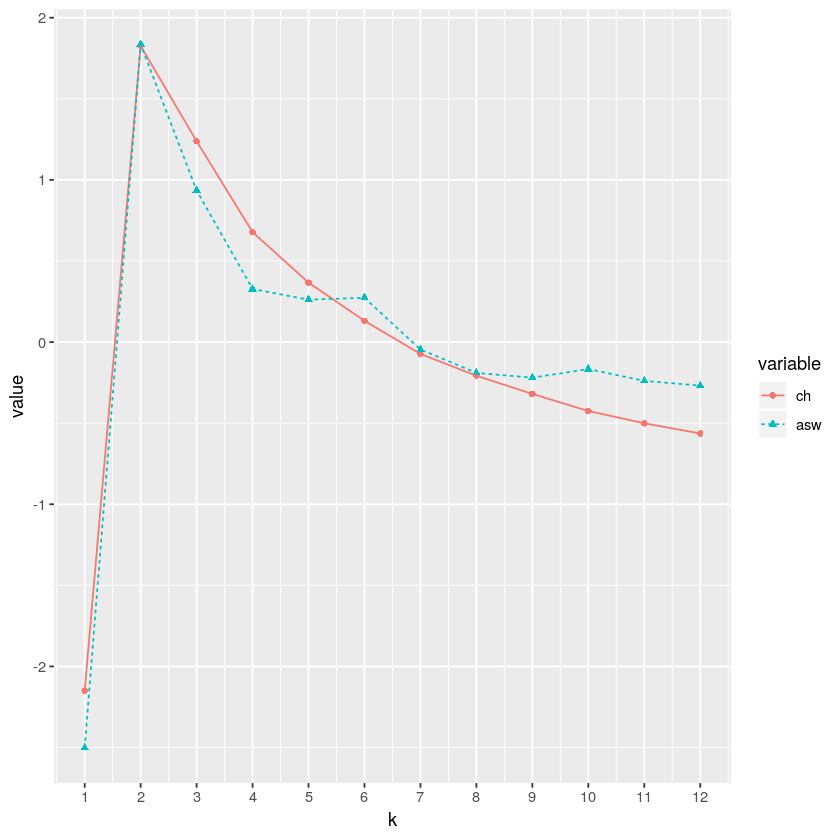

In [14]:
critframe <- data.frame(k=1:12, ch=scale(clustering.ch$crit),asw=scale(clustering.asw$crit))
critframe <- melt(critframe, id.vars=c("k"),variable.name="measure",value.name="score")

ggplot(critframe, aes(x=k, y=value, color=variable)) +
geom_point(aes(shape=variable)) + geom_line(aes(linetype=variable)) +
scale_x_continuous(breaks=1:12, labels=1:12)
summary(clustering.ch)

Παρατηρώτας το παραπάνω γράφημα καταλήγουμε ο καλύτερος αριθμός cluster είναι 2 και για τα δύο κριτήρια που χρησιμοποιήθηκαν.